## NLP & MultiClass Classification: Airline Twitter sentiment data
https://www.crowdflower.com/data-for-everyone/

** Dataset Information: **

- 14640 Scraped Twitter data for major U.S. airlines including positive, negative, and neutral tweets

** Attribute Information:**

- _unit_id                      
- _golden                       
- _unit_state                    
- _trusted_judgments           
- _last_judgment_at            
- airline_sentiment              
- airline_sentiment:confidence    
- negativereason                  
- negativereason:confidence     
- airline                      
- airline_sentiment_gold          
- name                         
- negativereason_gold         
- retweet_count          
- text                       
- tweet_coord                     
- tweet_created                  
- tweet_id                        
- tweet_location                  
- user_timezone                   

** Objective of this project **

predict sentiment from tweets
 - positive, negative, and neutral for multi-class
 - negative or not (positive and neutral) for binary-class

# Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load Data
df = pd.read_csv('Airline-Sentiment-2-w-AA.csv', encoding='latin')
pd.set_option('display.max_colwidth', -1)
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [8]:
df['text'].tail()

14635    @AmericanAir thank you we got on a different flight to Chicago.                                                                                       
14636    @AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc
14637    @AmericanAir Please bring American Airlines to #BlackBerry10                                                                                          
14638    @AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??               
14639    @AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?            
Name: text, dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 20 columns):
_unit_id                        14640 non-null int64
_golden                         14640 non-null bool
_unit_state                     14640 non-null object
_trusted_judgments              14640 non-null int64
_last_judgment_at               14584 non-null object
airline_sentiment               14640 non-null object
airline_sentiment:confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason:confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 

In [10]:
df.describe()

,_unit_id,_trusted_judgments,airline_sentiment:confidence,negativereason:confidence,retweet_count,tweet_id
count,1.464000e+04,14640.000000,14640.000000,10522.000000,14640.000000,1.464000e+04
mean,6.814957e+08,3.618648,0.900169,0.638298,0.082650,5.692184e+17
std,8.504314e+04,11.858704,0.162830,0.330440,0.745778,7.791092e+14
min,6.814482e+08,2.000000,0.335000,0.000000,0.000000,5.675880e+17
25%,6.814536e+08,3.000000,0.692300,0.360600,0.000000,5.685590e+17
50%,6.814578e+08,3.000000,1.000000,0.670600,0.000000,5.694780e+17
75%,6.814623e+08,3.000000,1.000000,1.000000,0.000000,5.698902e+17
max,6.816798e+08,248.000000,1.000000,1.000000,44.000000,5.703110e+17


## Exploratory data analysis (EDA)

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

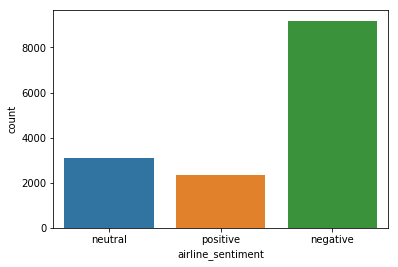

In [11]:
# inspect sentiment
sns.countplot(df['airline_sentiment'])
df['airline_sentiment'].value_counts() #imbalanced

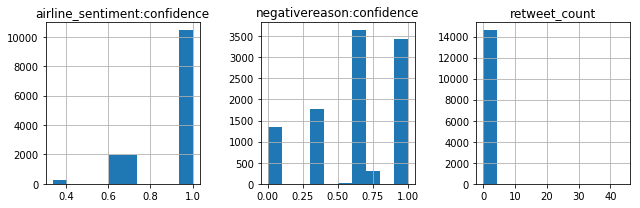

In [12]:
# numetic features
num_cols = ['airline_sentiment:confidence','negativereason:confidence','retweet_count']
df[num_cols].hist(layout=(1,3),figsize=(9,3))
plt.tight_layout()

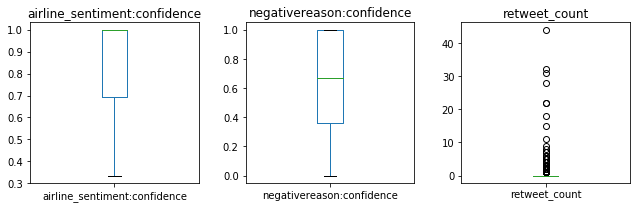

In [13]:
plt.figure(figsize=(9,3))
for i,name in enumerate(num_cols):
    plt.subplot(1,3,i+1)
    _ = df[num_cols[i]].plot(kind='box',title=name)
plt.tight_layout()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America    504 
Name: airline, dtype: int64

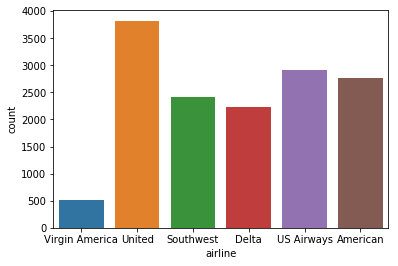

In [14]:
# categorical features
sns.countplot(df['airline']) 
df['airline'].value_counts() 

In [15]:
#df['tweet_location'].value_counts() 

In [16]:
# text length
df['text_length'] = df['text'].apply(len)
df[['airline_sentiment','text_length','text']].head()

,airline_sentiment,text_length,text
0,neutral,35,@VirginAmerica What @dhepburn said.
1,positive,72,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,71,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,126,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,55,@VirginAmerica and it's a really big bad thing about it


In [17]:
df['text_length'].describe()

count    14640.000000
mean     104.118511  
std      36.256550   
min      12.000000   
25%      77.000000   
50%      115.000000  
75%      136.000000  
max      229.000000  
Name: text_length, dtype: float64

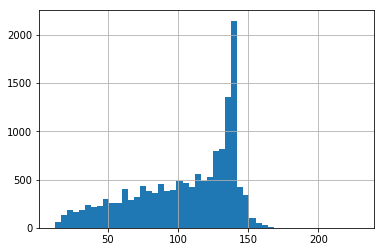

In [18]:
df['text_length'].hist(bins=50)

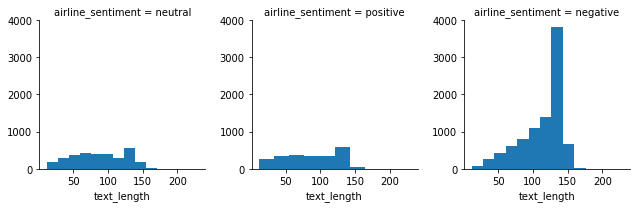

In [19]:
g = sns.FacetGrid(df,col='airline_sentiment')
g.map(plt.hist,'text_length')

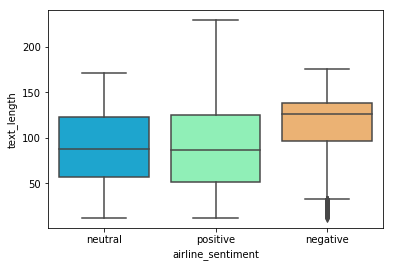

In [20]:
sns.boxplot(x='airline_sentiment',y='text_length',data=df,palette='rainbow')

In [21]:
sentiment = df.groupby('airline_sentiment').mean()
sentiment

,_unit_id,_golden,_trusted_judgments,airline_sentiment:confidence,negativereason:confidence,retweet_count,tweet_id,text_length
airline_sentiment,,,,,,,,
negative,6.815016e+08,0.003487,3.789823,0.933365,0.731769,0.093375,5.692602e+17,114.093702
neutral,6.814867e+08,0.000968,3.221362,0.823303,0.000000,0.060987,5.691841e+17,87.785737
positive,6.814846e+08,0.002116,3.474820,0.872039,0.000000,0.069403,5.691006e+17,86.794329


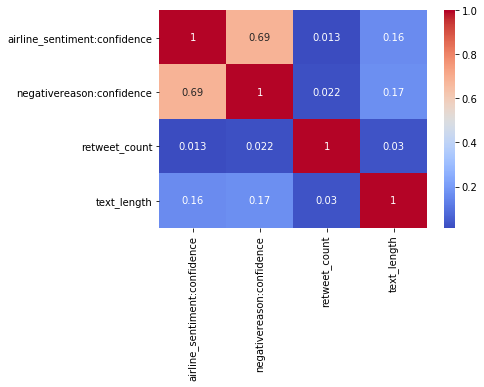

In [22]:
num_cols = num_cols + ['airline_sentiment','text_length']
sns.heatmap(df[num_cols].corr(), annot = True, cmap='coolwarm')

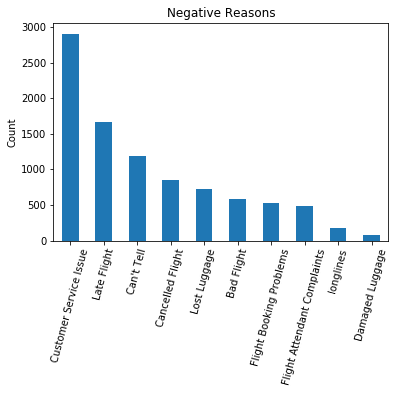

In [30]:
# negative reason
df['negativereason'].value_counts().plot(kind='bar', title='Negative Reasons')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

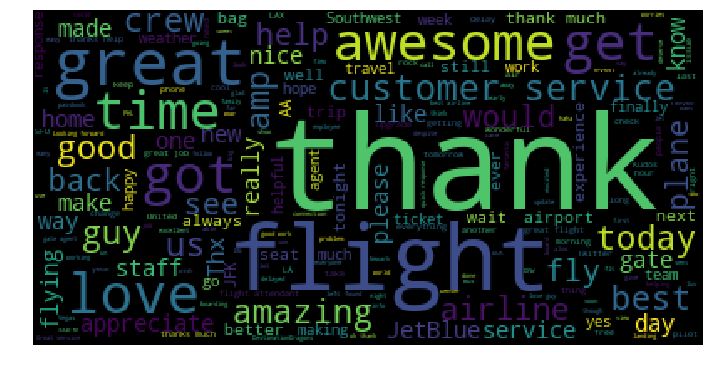

In [11]:
# word cloud
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re

def plot_word_cloud(sentiment):
    text = df[df['airline_sentiment']==sentiment]['text'].to_string()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text)

    wordcloud = WordCloud(
        relative_scaling=0.5,
        stopwords=set(stopwords.words('english')+['rt','via'])).generate(text)

    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

# positive
plot_word_cloud('positive')

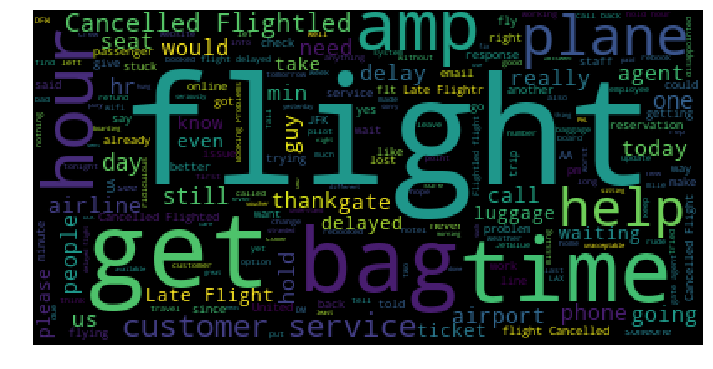

In [12]:
# negative
plot_word_cloud('negative')

In [31]:
# create new class 'negative' column --> binary class
dict_class = {'neutral':0, 'positive':0, 'negative':1}
df['negative'] = df['airline_sentiment'].map(dict_class)
df[['airline_sentiment','negative']].head()

,airline_sentiment,negative
0,neutral,0
1,positive,0
2,neutral,0
3,negative,1
4,negative,1


In [32]:
df['negative'].value_counts()

1    9178
0    5462
Name: negative, dtype: int64

# Text preprocessing

** Clean text **

In [33]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

corpus = []
for i in range(0, len(df)):
    #remove '[link]'
    text = re.sub('\[link]', '', df['text'][i]) 
    #remove urls
    text = re.sub(r'http\S+', '', text) 
    #remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', text) 
    #lowercase, split to words
    text = text.lower().split() 
    #stemming, remove stopwords, RT and VIA
    ps = PorterStemmer() 
    text = [ps.stem(word) for word in text 
            if not word in set(stopwords.words('english')+['rt','via'])]
    #rejoin to text
    text = ' '.join(text) 
    corpus.append(text)

In [39]:
#i=0
#print(df['text'][i])
#print(corpus[i])

** Creat Bag-Of-Words model **

In [41]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
X = CountVectorizer().fit_transform(corpus)#max_features = 5000
X = TfidfTransformer().fit_transform(X)
print(X.shape)

(14640, 9138)


## 1. Binary Classification

In [42]:
y = df['negative'].values
seed = 101 #random seed for reproducibility
np.random.seed(seed)

#### Split Train Test sets

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y,random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11712, 9138) (2928, 9138) (11712,) (2928,)


In [44]:
np.unique(y_train,return_counts=True) #similar ratio to original class

(array([0, 1], dtype=int64), array([4370, 7342], dtype=int64))

#### Model Train

Accuracy: 99.8%


             precision    recall  f1-score   support

          0       1.00      1.00      1.00      4370
          1       1.00      1.00      1.00      7342

avg / total       1.00      1.00      1.00     11712



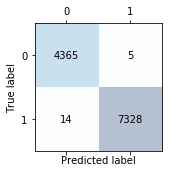

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
# train model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

#accuracy score
y_pred_train = model.predict(X_train)
print('Accuracy: {:0.1f}%'.format(accuracy_score(y_train,y_pred_train)*100))

#classification report
print('\n')
print(classification_report(y_train, y_pred_train))

#confusion matrix
confmat = confusion_matrix(y_train, y_pred_train)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

#### Model Evaluation with Test set

Accuracy: 80.6%


             precision    recall  f1-score   support

          0       0.79      0.65      0.72      1092
          1       0.81      0.90      0.85      1836

avg / total       0.80      0.81      0.80      2928



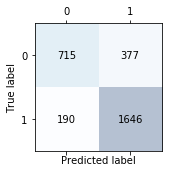

In [46]:
# predict class with test set (new, unseen)
y_pred_test = model.predict(X_test)
print('Accuracy: {:0.1f}%'.format(accuracy_score(y_test,y_pred_test)*100))

#classification report
print('\n')
print(classification_report(y_test, y_pred_test))

#confusion matrix
confmat = confusion_matrix(y_test, y_pred_test)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

## 2. Multi-class Classification

In [47]:
y = df['airline_sentiment'].values
seed = 101 #random seed for reproducibility
np.random.seed(seed)

#### Split Train Test sets

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y,random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
np.unique(y_train,return_counts=True) #similar ratio to original class

(11712, 9138) (2928, 9138) (11712,) (2928,)


(array(['negative', 'neutral', 'positive'], dtype=object),
 array([7342, 2479, 1891], dtype=int64))

#### Model Train

Accuracy: 99.5%


             precision    recall  f1-score   support

   negative       1.00      1.00      1.00      7342
    neutral       0.99      0.99      0.99      2479
   positive       0.99      0.99      0.99      1891

avg / total       0.99      0.99      0.99     11712



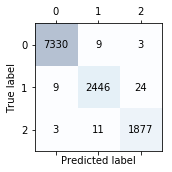

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
# train model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

#accuracy score
y_pred_train = model.predict(X_train)
print('Accuracy: {:0.1f}%'.format(accuracy_score(y_train,y_pred_train)*100))

#classification report
print('\n')
print(classification_report(y_train, y_pred_train))

#confusion matrix
confmat = confusion_matrix(y_train, y_pred_train)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

#### Model Evaluation with Test set

Accuracy: 76.3%


             precision    recall  f1-score   support

   negative       0.78      0.94      0.86      1836
    neutral       0.64      0.37      0.47       620
   positive       0.77      0.58      0.66       472

avg / total       0.75      0.76      0.74      2928



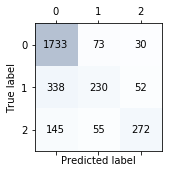

In [50]:
# predict class with test set (new, unseen)
y_pred_test = model.predict(X_test)
print('Accuracy: {:0.1f}%'.format(accuracy_score(y_test,y_pred_test)*100))

#classification report
print('\n')
print(classification_report(y_test, y_pred_test))

#confusion matrix
confmat = confusion_matrix(y_test, y_pred_test)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()